# Data processing of plume simulation

In [28]:
#Numpy
import numpy as np
#Scipy
from scipy import special as scsp
from scipy import stats
from numpy import random as rdm
#Pyplot
import matplotlib.pyplot as plt
#Multi-CPU job
from joblib import Parallel, delayed
import multiprocessing as mpg
#Time
import time
#Json
import json
#Os for file management
import os.path

from decimal import Decimal

RERUN = False #To rerun all computations (False will load from file if they exist)
NCORES_MAX = -2 #Maximal number of cores in use
extension = '.pdf' #fig file extension
DIR  = 'D:/pdm_data/Bentheimer1000/Plumes/' #On desktop
#♦DIR  = 'C:/Users/Antoine/Documents/Etudes/Master CSE/pdm/data/' #On laptop

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [29]:
D_M    = 0.0
SUBDIR = 'DM0.0/'

T_SNAP = [1E-2, 1E-1, 1, 1E1, 1E2, 1E3, 1E4]
N_SNAP = len(T_SNAP)
FNAMES = {T_SNAP[n_-1] : DIR + SUBDIR + 'plume_1_'+ str(n_) + '.txt' for n_ in range(1,N_SNAP+1)}

In [30]:
dataDNS = {}
for key in FNAMES :
    with open(FNAMES[key], 'r') as f:
        dataDNS[key] = np.loadtxt(f)

In [31]:
def Extract_pdf(data_, nbins = 500, dst = True) :
    pdf_ = np.histogram(data_, bins = nbins, density = dst);
    pdf_ = np.array([pdf_[1][0:-1], pdf_[0]])
    return pdf_

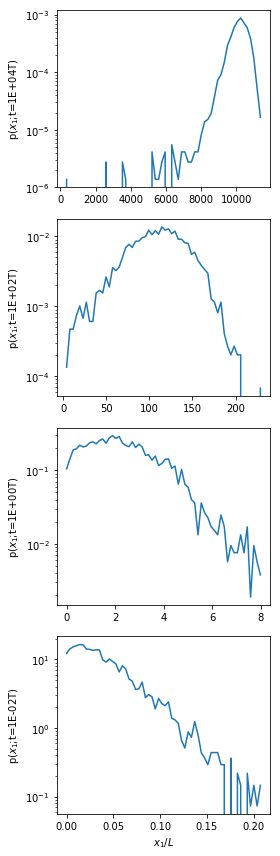

In [38]:
fig, axs = plt.subplots(4,1, figsize = (4,12))
m_ = 0
d_ = 0
for t_ in [1E4, 1E2, 1, 1E-2] :
    ax = axs[m_]
    xy = Extract_pdf(dataDNS[t_][:,d_], 60)
    ax.semilogy(xy[0], xy[1], color = color_cycle[d_]);
    ax.set_ylabel(r'p($x_'+str(d_+1)+'$;t='+'%.0E' %Decimal(str(t_))+'T)')
    m_ += 1
ax.set_xlabel('$x_'+str(d_+1)+'/L$')
plt.tight_layout()
plt.savefig(DIR+'Figures/Plume_x1_displacement'+extension)

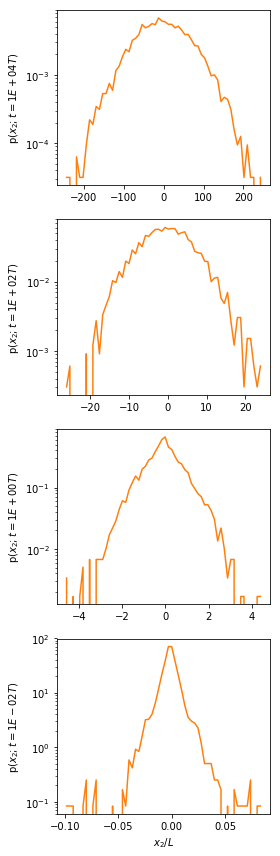

In [33]:
fig, axs = plt.subplots(4,1, figsize = (4,12))
m_ = 0
d_ = 1
for t_ in [1E4, 1E2, 1, 1E-2] :
    ax = axs[m_]
    xy = Extract_pdf(dataDNS[t_][:,d_], 60)
    ax.semilogy(xy[0], xy[1], color = color_cycle[d_]);
    ax.set_ylabel(r'p$(x_'+str(d_+1)+';t='+'%.0E' %Decimal(str(t_))+'T)$')
    m_ += 1
ax.set_xlabel('$x_'+str(d_+1)+'/L$')
plt.tight_layout()
plt.savefig(DIR+'Figures/Plume_x2_displacement'+extension)

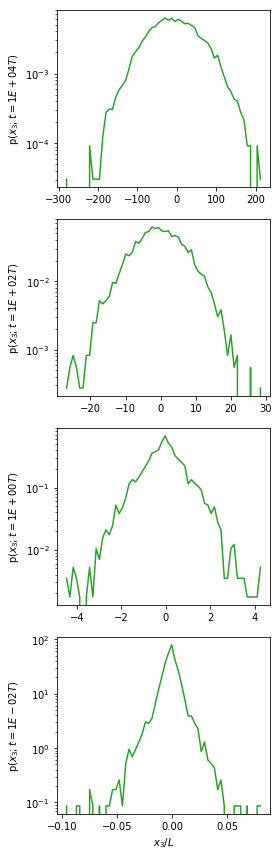

In [34]:
fig, axs = plt.subplots(4,1, figsize = (4,12))
m_ = 0
d_ = 2
for t_ in [1E4, 1E2, 1, 1E-2] :
    ax = axs[m_]
    xy = Extract_pdf(dataDNS[t_][:,d_], 60)
    ax.semilogy(xy[0], xy[1], color = color_cycle[d_]);
    ax.set_ylabel(r'p$(x_'+str(d_+1)+';t='+'%.0E' %Decimal(str(t_))+'T)$')
    m_ += 1
ax.set_xlabel('$x_'+str(d_+1)+'/L$')
plt.tight_layout()
plt.savefig(DIR+'Figures/Plume_x3_displacement'+extension)

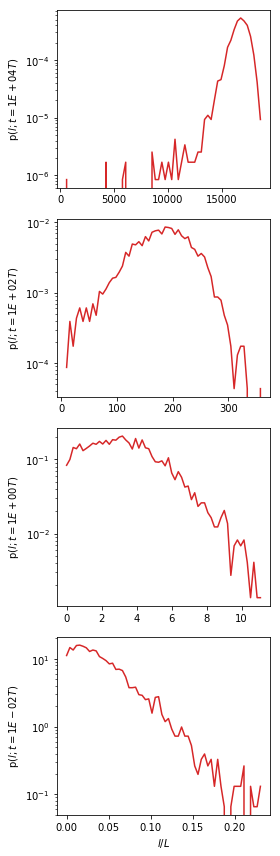

In [35]:
fig, axs = plt.subplots(4,1, figsize = (4,12))
m_ = 0
d_ = 3
for t_ in [1E4, 1E2, 1, 1E-2] :
    ax = axs[m_]
    xy = Extract_pdf(dataDNS[t_][:,d_], 60)
    ax.semilogy(xy[0], xy[1], color = color_cycle[d_]);
    ax.set_ylabel(r'p$(l;t='+'%.0E' %Decimal(str(t_))+'T)$')
    m_ += 1
ax.set_xlabel('$l/L$')
plt.tight_layout()
plt.savefig(DIR+'Figures/Plume_l_displacement'+extension)

In [36]:
print(len(dataDNS[key][:,0]))

3882
